In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from jupyterthemes import jtplot
jtplot.style(context='talk',fscale=1.4, spines=False, gridlines="--",grid=False)

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


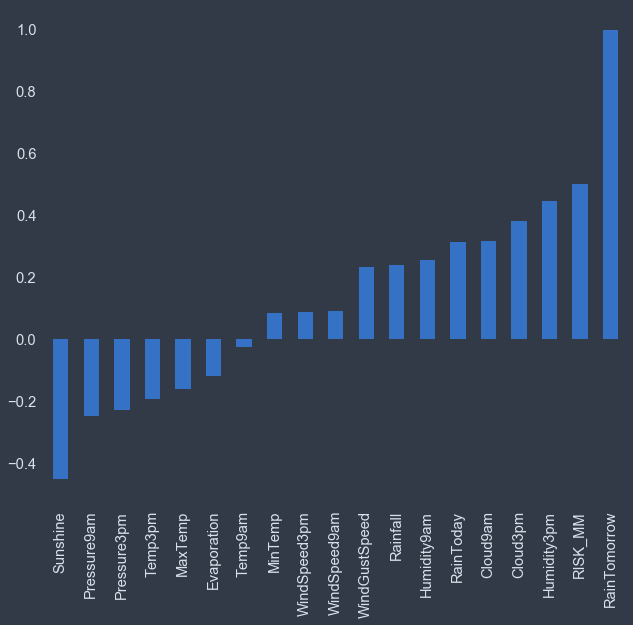

In [5]:
df['RainTomorrow']=df['RainTomorrow'].map({'No':0, 'Yes':1})
df['RainToday']=df['RainToday'].map({'No':0, 'Yes':1})

df.corr()['RainTomorrow'].sort_values().plot(kind='bar')

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

## Fill null

#### Evaporation

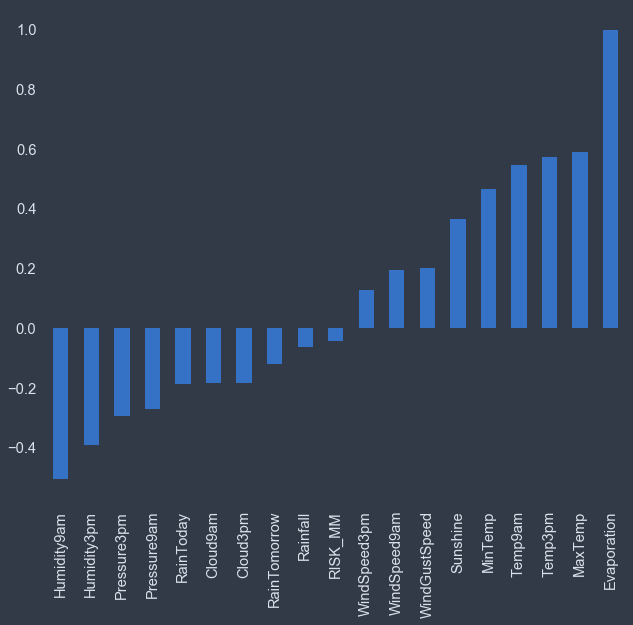

In [7]:
df.corr()['Evaporation'].sort_values().plot(kind='bar')

In [8]:
df=df.dropna(subset=['MaxTemp']).reset_index()
evaporation=df.groupby('MaxTemp').mean()['Evaporation'].reset_index()
evaporation.columns=['maxtemp','eva_mean']
evaporation

,maxtemp,eva_mean
0,-4.8,NaN
1,-4.1,NaN
2,-3.8,NaN
3,-3.7,NaN
4,-3.2,NaN
...,...,...
500,46.8,17.266667
501,46.9,NaN
502,47.0,NaN
503,47.3,16.000000


Text(0.5, 0, 'max temp')

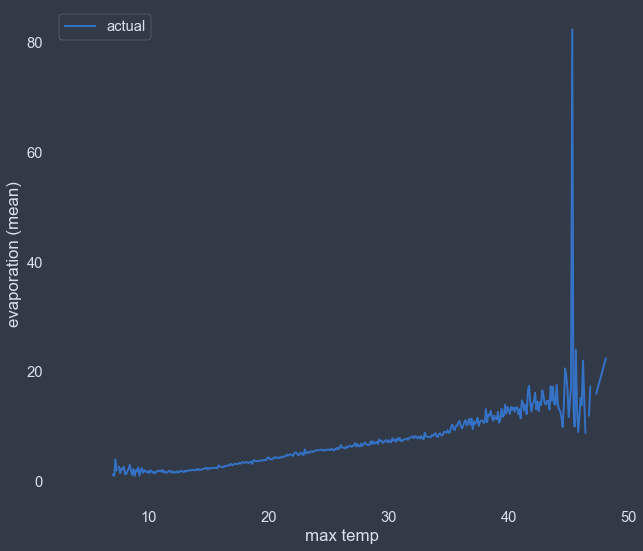

In [9]:
plt.plot(evaporation.maxtemp,evaporation.eva_mean)
plt.legend(['actual'])
plt.ylabel('evaporation (mean)')
plt.xlabel('max temp')

In [10]:
evaporation_clean = evaporation.dropna(subset=['eva_mean'])
x=evaporation_clean.maxtemp.values
y=evaporation_clean.eva_mean.values

a,b,c,d = np.polyfit(x, y,3)
p = np.poly1d([a, b, c, d])

In [11]:
fit=[]
for i in x:
    pred=p(i)
    fit.append(pred)
     
evaporation_clean['fit']=fit

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'max temp')

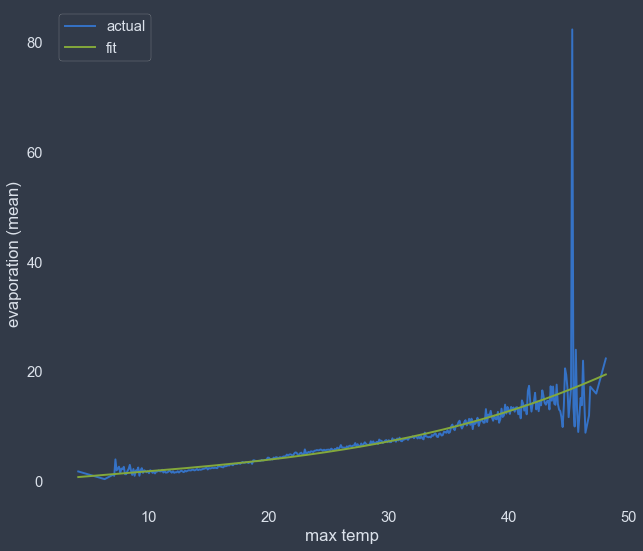

In [12]:
plt.plot(evaporation_clean.maxtemp,evaporation_clean.eva_mean)
plt.plot(evaporation_clean.maxtemp,evaporation_clean.fit)
plt.legend(['actual','fit'])
plt.ylabel('evaporation (mean)')
plt.xlabel('max temp')

,maxtemp,eva_mean,prediction
0,-4.8,NaN,-1.065035
1,-4.1,NaN,-0.896454
2,-3.8,NaN,-0.825816
3,-3.7,NaN,-0.802477
4,-3.2,NaN,-0.687303
...,...,...,...
500,46.8,17.266667,18.254575
501,46.9,NaN,18.347244
502,47.0,NaN,18.440290
503,47.3,16.000000,18.721701


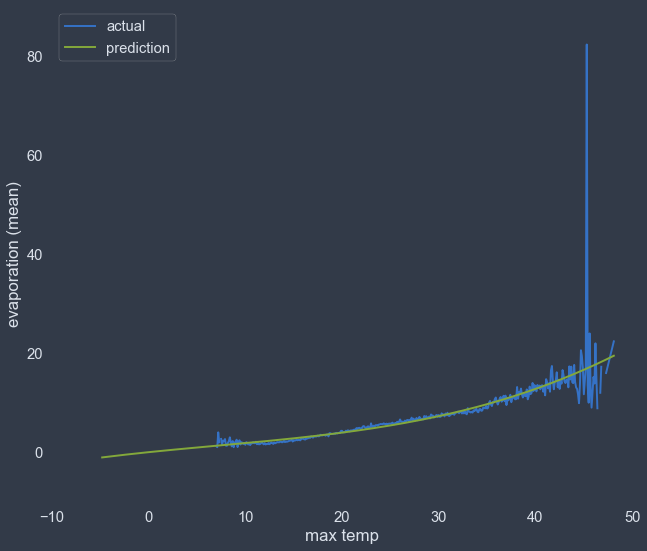

In [13]:
predict=[]
for i in evaporation.maxtemp.values:
    pred=p(i)
    predict.append(pred)
     
evaporation['prediction']=predict

plt.plot(evaporation.maxtemp,evaporation.eva_mean)
plt.plot(evaporation.maxtemp,evaporation.prediction)
plt.legend(['actual','prediction'])
plt.ylabel('evaporation (mean)')
plt.xlabel('max temp')
plt.axis([-10,50,-10,90])
evaporation

In [14]:
evaporation=evaporation.drop('eva_mean',axis=1)

In [15]:
evaporation=evaporation.groupby('maxtemp').prediction.max()

def fill_missing(a,b):
    if np.isnan(b):
        return evaporation[a]
    else:
        return b


In [16]:
evaporation

maxtemp
-4.8     -1.065035
-4.1     -0.896454
-3.8     -0.825816
-3.7     -0.802477
-3.2     -0.687303
           ...    
 46.8    18.254575
 46.9    18.347244
 47.0    18.440290
 47.3    18.721701
 48.1    19.488970
Name: prediction, Length: 505, dtype: float64

In [17]:
df['Evaporation']=df.apply(lambda x: fill_missing(x['MaxTemp'],x['Evaporation']),axis=1)


In [18]:
df[['MaxTemp','Evaporation']]

,MaxTemp,Evaporation
0,22.9,4.744544
1,25.1,5.433669
2,25.7,5.635524
3,28.0,6.469908
4,32.3,8.320003
...,...,...
141866,21.8,4.427803
141867,23.4,4.894433
141868,25.3,5.500261
141869,26.9,6.058485


#### Sunshine

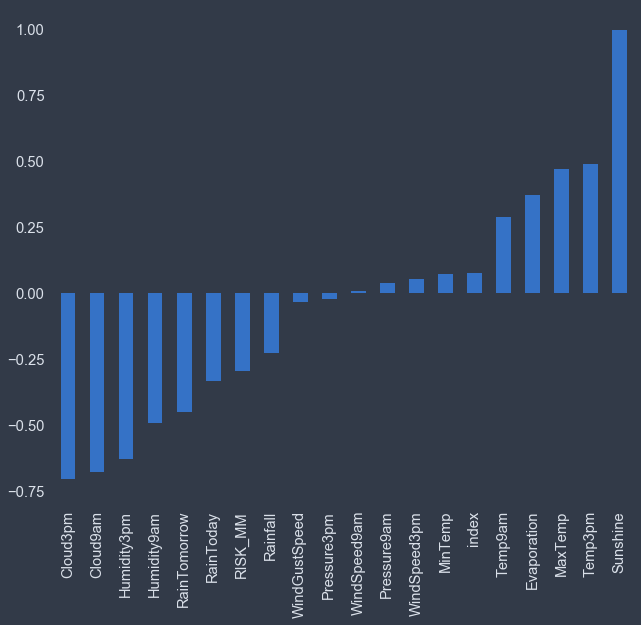

In [19]:
df.corr()['Sunshine'].sort_values().plot(kind='bar')

In [20]:
df=df.dropna(subset=['Humidity3pm']).reset_index()

Humidity3pm
0.0       9.766667
1.0      11.433333
2.0      11.837500
3.0      11.210870
4.0      11.563291
           ...    
96.0      1.372376
97.0      1.543750
98.0      2.052564
99.0      2.182301
100.0     1.462245
Name: Sunshine, Length: 101, dtype: float64


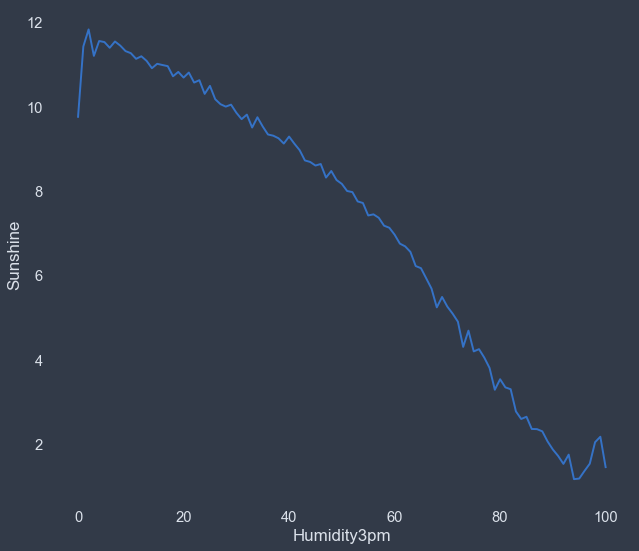

In [21]:
sunshine=df.groupby('Humidity3pm').mean()['Sunshine']
print(sunshine)
plt.ylabel('Sunshine')
plt.xlabel('Humidity3pm')
sunshine.plot()


In [22]:
def fill_missing(a,b):
    if np.isnan(b):
        return sunshine[a]
    else:
        return b

In [23]:
df['Sunshine']=df.apply(lambda x: fill_missing(x['Humidity3pm'],x['Sunshine']),axis=1)

In [24]:
df[['Humidity3pm','Sunshine']]

,Humidity3pm,Sunshine
0,22.0,10.578261
1,25.0,10.499866
2,30.0,9.863670
3,16.0,10.993803
4,33.0,9.511982
...,...,...
138441,27.0,10.065135
138442,24.0,10.309648
138443,21.0,10.815789
138444,24.0,10.309648


#### Pressure9am 

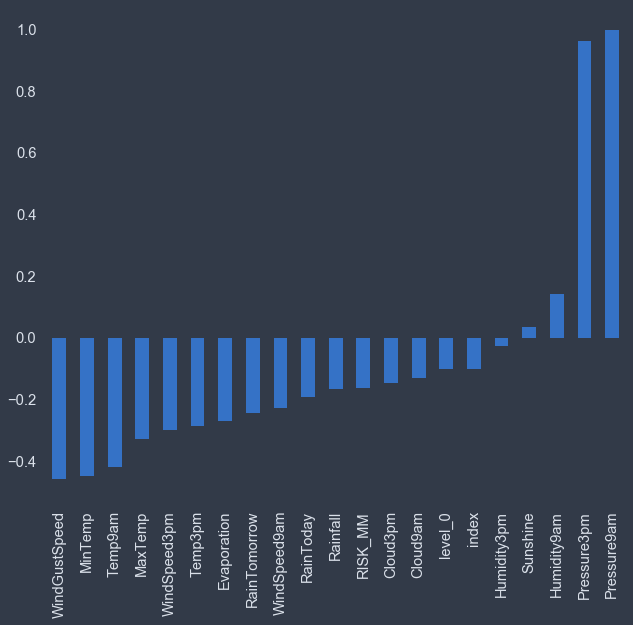

In [25]:
df.corr()['Pressure9am'].sort_values().plot(kind='bar')

In [26]:
df=df.dropna(subset=['WindGustSpeed'])


WindGustSpeed
6.0      1034.500000
7.0      1024.609091
9.0      1025.836585
11.0     1025.723729
13.0     1025.640441
            ...     
122.0    1007.750000
124.0     996.800000
126.0    1004.200000
130.0    1000.900000
135.0    1009.450000
Name: Pressure9am, Length: 67, dtype: float64


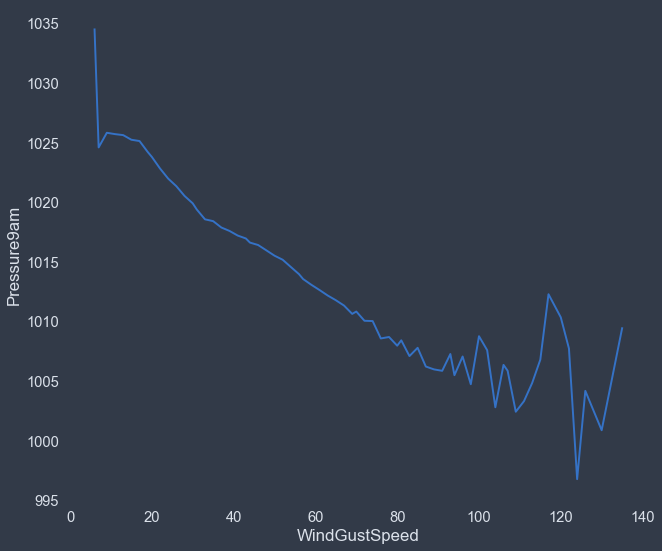

In [27]:
press9am=df.groupby('WindGustSpeed').mean()['Pressure9am']

print(press9am)
plt.ylabel('Pressure9am')
plt.xlabel('WindGustSpeed')
press9am.plot()

In [28]:
def fill_missing(a,b):
    if np.isnan(b):
        return press9am[a]
    else:
        return b

In [29]:
df['Pressure9am']=df.apply(lambda x: fill_missing(x['WindGustSpeed'],x['Pressure9am']),axis=1)

In [30]:
df[['WindGustSpeed','Pressure9am']]

,WindGustSpeed,Pressure9am
0,44.0,1007.7
1,44.0,1010.6
2,46.0,1007.6
3,24.0,1017.6
4,41.0,1010.8
...,...,...
138441,31.0,1024.7
138442,31.0,1024.6
138443,22.0,1023.5
138444,37.0,1021.0


#### Pressure3pm

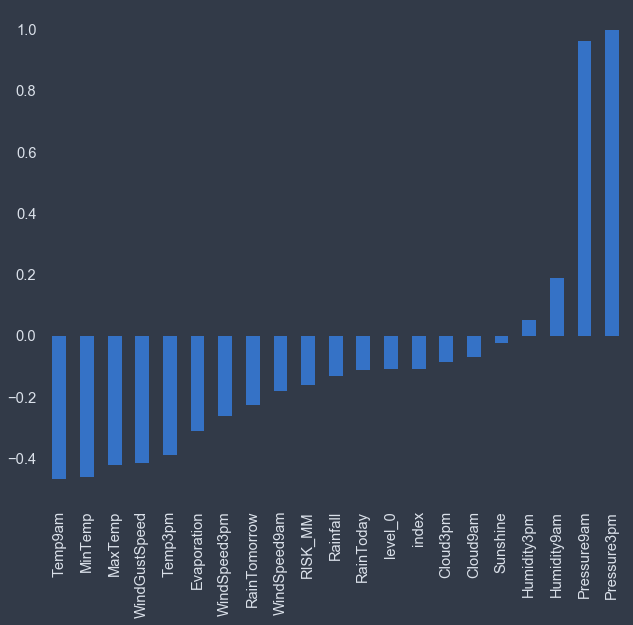

In [31]:
df.corr()['Pressure3pm'].sort_values().plot(kind='bar')

Text(0.5, 0, 'Pressure3pm')

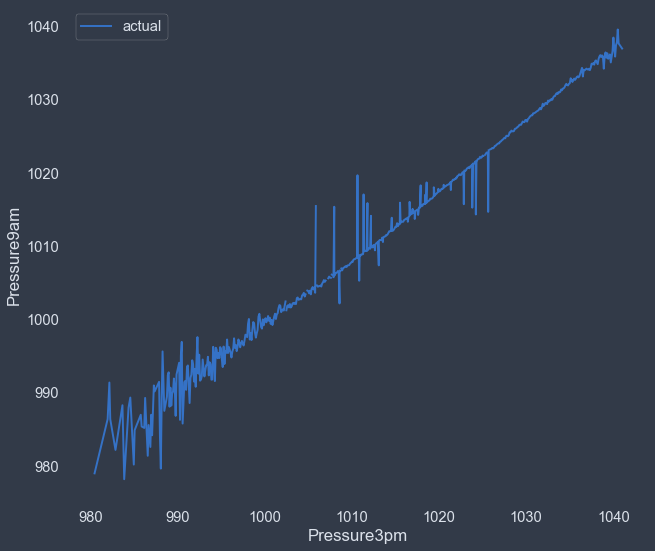

In [32]:
press3pm =df.groupby('Pressure9am').mean()['Pressure3pm'].reset_index()

plt.plot(press3pm.Pressure9am,press3pm.Pressure3pm)
plt.legend(['actual'])
plt.ylabel('Pressure9am')
plt.xlabel('Pressure3pm')

In [33]:
press3pm_clean = press3pm.dropna(subset=['Pressure3pm'])
x=press3pm_clean.Pressure9am.values
y=press3pm_clean.Pressure3pm.values

a,b = np.polyfit(x, y,1)
p = np.poly1d([a, b])

In [34]:
fit=[]
for i in x:
    pred=p(i)
    fit.append(pred)
     
press3pm_clean['fit']=fit

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Pressure9am')

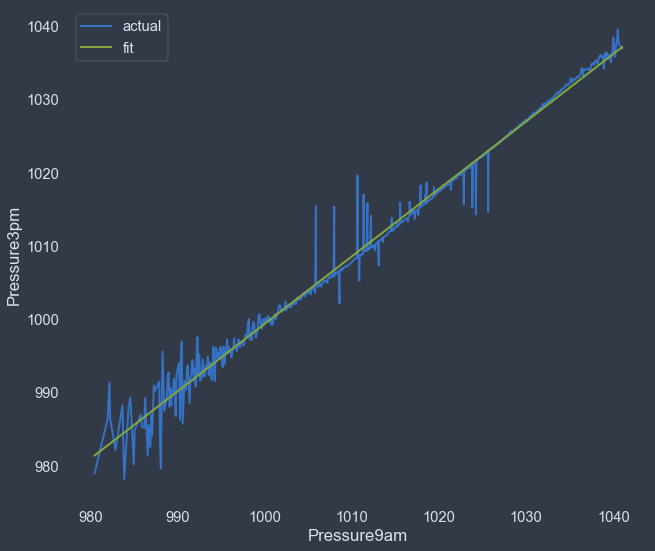

In [35]:
plt.plot(press3pm_clean.Pressure9am,press3pm_clean.Pressure3pm)
plt.plot(press3pm_clean.Pressure9am,press3pm_clean.fit)
plt.legend(['actual','fit'])
plt.ylabel('Pressure3pm')
plt.xlabel('Pressure9am')

,Pressure9am,Pressure3pm,prediction
0,980.5,979.000000,981.430967
1,982.0,986.400000,982.813522
2,982.2,991.400000,982.997863
3,982.3,986.400000,983.090033
4,982.9,982.200000,983.643055
...,...,...,...
596,1040.3,1037.466667,1036.548826
597,1040.4,1037.866667,1036.640996
598,1040.5,1039.600000,1036.733167
599,1040.6,1037.700000,1036.825337


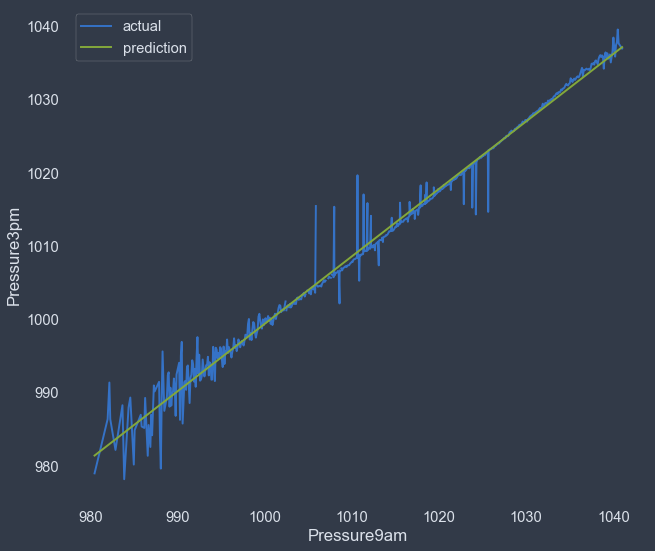

In [36]:
predict=[]
for i in press3pm.Pressure9am.values:
    pred=p(i)
    predict.append(pred)
     
press3pm['prediction']=predict

plt.plot(press3pm.Pressure9am,press3pm.Pressure3pm)
plt.plot(press3pm.Pressure9am,press3pm.prediction)
plt.legend(['actual','prediction'])
plt.ylabel('Pressure3pm')
plt.xlabel('Pressure9am')
press3pm

In [37]:
press3pm=press3pm.drop('Pressure3pm',axis=1)

In [38]:
press3pm=press3pm.groupby('Pressure9am').prediction.max()

def fill_missing(a,b):
    if np.isnan(b):
        return press3pm[a]
    else:
        return b

In [39]:
df['Pressure3pm']=df.apply(lambda x: fill_missing(x['Pressure9am'],x['Pressure3pm']),axis=1)

In [40]:
df[['Pressure9am','Pressure3pm']]

,Pressure9am,Pressure3pm
0,1007.7,1007.1
1,1010.6,1007.8
2,1007.6,1008.7
3,1017.6,1012.8
4,1010.8,1006.0
...,...,...
138441,1024.7,1021.2
138442,1024.6,1020.3
138443,1023.5,1019.1
138444,1021.0,1016.8


#### Cloud9am  

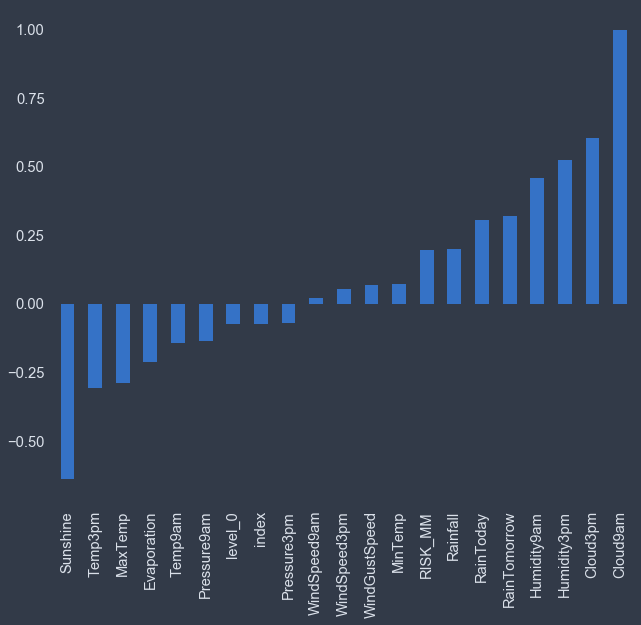

In [41]:
df.corr()['Cloud9am'].sort_values().plot(kind='bar')

Sunshine
0.0     7.616866
0.1     7.476852
0.2     7.345411
0.3     7.348974
0.4     7.380769
          ...   
14.0    1.818182
14.1    1.600000
14.2    1.500000
14.3    1.333333
14.5    0.000000
Name: Cloud9am, Length: 246, dtype: float64


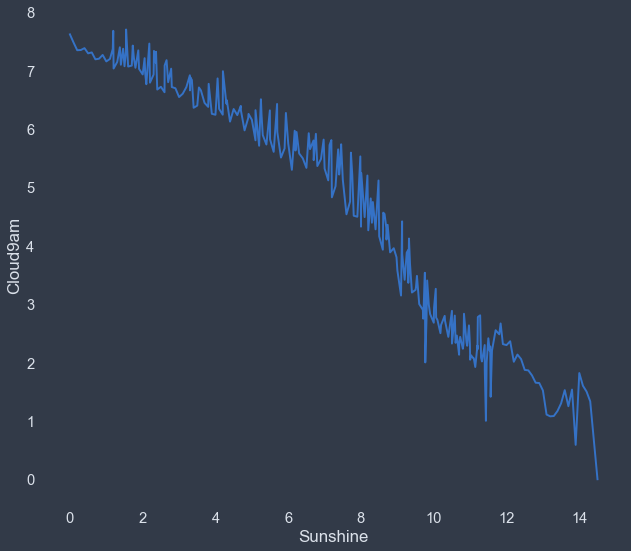

In [42]:
cloud9am=df.groupby('Sunshine').mean()['Cloud9am']

print(cloud9am)
plt.ylabel('Cloud9am')
plt.xlabel('Sunshine')
cloud9am.plot()

In [43]:
def fill_missing(a,b):
    if np.isnan(b):
        return cloud9am[a]
    else:
        return b

In [44]:
df['Cloud9am']=df.apply(lambda x: fill_missing(x['Sunshine'],x['Cloud9am']),axis=1)

In [45]:
df[['Sunshine','Cloud9am']]

,Sunshine,Cloud9am
0,10.578261,8.000000
1,10.499866,2.882759
2,9.863670,2.987952
3,10.993803,2.304348
4,9.511982,7.000000
...,...,...
138441,10.065135,2.767045
138442,10.309648,2.713415
138443,10.815789,2.308824
138444,10.309648,2.713415


#### Cloud3pm

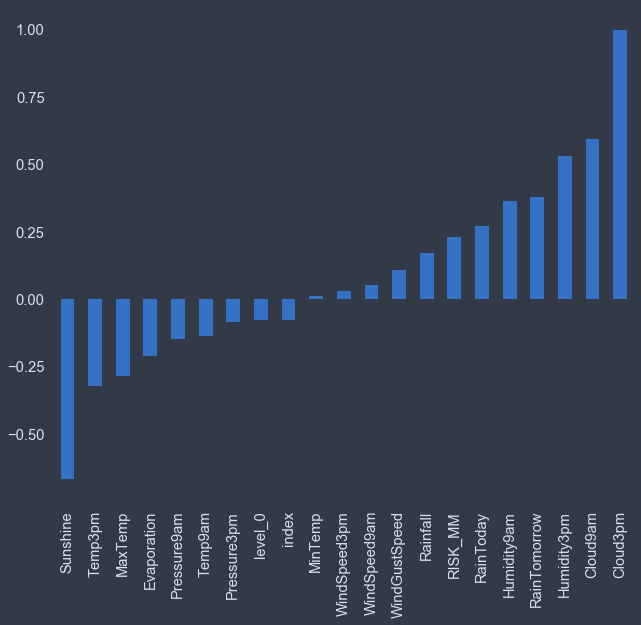

In [46]:
df.corr()['Cloud3pm'].sort_values().plot(kind='bar')

Sunshine
0.0     7.704797
0.1     7.483796
0.2     7.397059
0.3     7.433628
0.4     7.316406
          ...   
14.0    1.100000
14.1    3.666667
14.2    4.000000
14.3    0.666667
14.5    0.000000
Name: Cloud3pm, Length: 246, dtype: float64


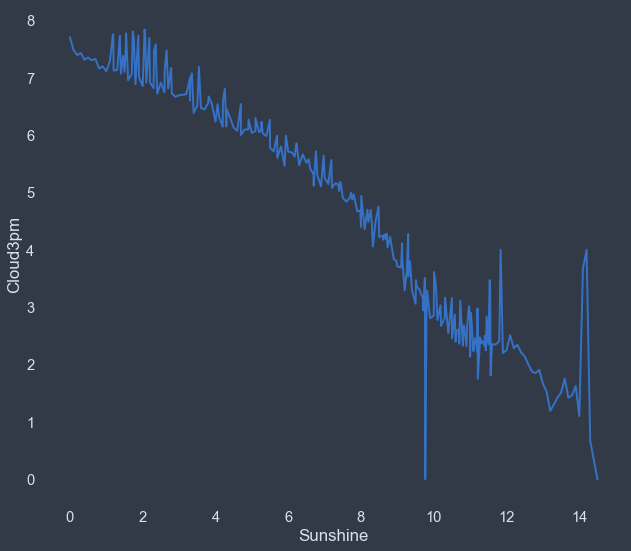

In [47]:
cloud3pm=df.groupby('Sunshine').mean()['Cloud3pm']

print(cloud3pm)
plt.ylabel('Cloud3pm')
plt.xlabel('Sunshine')
cloud3pm.plot()

In [48]:
def fill_missing(a,b):
    if np.isnan(b):
        return cloud3pm[a]
    else:
        return b

In [49]:
df['Cloud3pm']=df.apply(lambda x: fill_missing(x['Sunshine'],x['Cloud3pm']),axis=1)

In [50]:
df[['Sunshine','Cloud3pm']]

,Sunshine,Cloud3pm
0,10.578261,2.872000
1,10.499866,3.161074
2,9.863670,2.000000
3,10.993803,2.879310
4,9.511982,8.000000
...,...,...
138441,10.065135,3.304813
138442,10.309648,3.166667
138443,10.815789,2.656934
138444,10.309648,3.166667


#### Final prep

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121790 entries, 0 to 138445
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   level_0        121790 non-null  int64  
 1   index          121790 non-null  int64  
 2   Date           121790 non-null  object 
 3   Location       121790 non-null  object 
 4   MinTemp        121790 non-null  float64
 5   MaxTemp        121790 non-null  float64
 6   Rainfall       121790 non-null  float64
 7   Evaporation    121790 non-null  float64
 8   Sunshine       121790 non-null  float64
 9   WindGustDir    121790 non-null  object 
 10  WindGustSpeed  121790 non-null  float64
 11  WindDir9am     121790 non-null  object 
 12  WindDir3pm     121790 non-null  object 
 13  WindSpeed9am   121790 non-null  float64
 14  WindSpeed3pm   121790 non-null  float64
 15  Humidity9am    121790 non-null  float64
 16  Humidity3pm    121790 non-null  float64
 17  Pressure9am    121790 non-nul

In [56]:
df = df.dropna(subset=['MinTemp'])
df = df.dropna(subset=['Rainfall'])
df = df.dropna(subset=['WindGustDir'])
df = df.dropna(subset=['WindDir9am'])
df = df.dropna(subset=['WindDir3pm'])

df = df.dropna(subset=['WindSpeed9am'])
df = df.dropna(subset=['WindSpeed3pm'])
df = df.dropna(subset=['Humidity9am'])
df = df.dropna(subset=['Temp9am'])
df = df.dropna(subset=['RainToday'])

df = df.drop('level_0',axis=1)
df = df.drop('index',axis=1)


In [66]:
df['str_split'] = df.Date.str.split('-')
df['Month'] = df.str_split.str.get(1)
df = df.drop('Date',axis=1)
df = df.drop('str_split',axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121790 entries, 0 to 138445
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121790 non-null  object 
 1   MinTemp        121790 non-null  float64
 2   MaxTemp        121790 non-null  float64
 3   Rainfall       121790 non-null  float64
 4   Evaporation    121790 non-null  float64
 5   Sunshine       121790 non-null  float64
 6   WindGustDir    121790 non-null  object 
 7   WindGustSpeed  121790 non-null  float64
 8   WindDir9am     121790 non-null  object 
 9   WindDir3pm     121790 non-null  object 
 10  WindSpeed9am   121790 non-null  float64
 11  WindSpeed3pm   121790 non-null  float64
 12  Humidity9am    121790 non-null  float64
 13  Humidity3pm    121790 non-null  float64
 14  Pressure9am    121790 non-null  float64
 15  Pressure3pm    121790 non-null  float64
 16  Cloud9am       121790 non-null  float64
 17  Cloud3pm       121790 non-nul

In [69]:
df.to_csv(r'cleandf.csv', index = False)